# **Trabajo Práctico Número 1**

*Para los ejercicios serán necesarias las librerias **numpy**, **scipy** y **matplotlib**, por lo tanto las importamos.*

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

\
$\textbf{Ejercicio 1}$

Dada una matriz A $\in \mathbb R^{n \times n}$ retorna las dos matrices L y U de la descomposiciónn A = LU sin pivoteo. 
Si A tiene algún 0 en la diagonal, imprime un mensaje de error y devuelve las matrices In y A.

In [2]:
def descompLU(A):
    A = A.astype(np.float64)

    n = A.shape[0] 

    if not np.diag(A).all():
        print('Error: Hay por lo menos un cero en la diagonal')
        identidad = np.eye(n)
        return (identidad,A)

    if n == 1:
        L = 1
        U = A[0,0]
        return (L, U)

    U = np.zeros_like(A)
    U[0,:] = A[0,:]  # Primer fila de U es igual a primer fila de A

    L = np.eye(n)
    L[1:, 0] = A[1:,0] / U[0,0] #L_21

    matriz_recursiva = A[1:,1:] - L[1:, 0].reshape(n-1,1)@U[0,1:].reshape(1,n-1)

    L_22, U_22 = descompLU(matriz_recursiva)
    L[1:,1:] = L_22 
    U[1:,1:] = U_22 
    
    return (L,U)

\
$\textbf{Ejercicio 3}$

Dada una matriz A cuadrada de tamaño $n \times n$ y un vector b de tamaño n, devuelve la solución x del sistema Ax = b calculando primero
la descomposición LU y resolviendo luego los sistemas Ly = b y Ux = y.

In [3]:
def resolverLU (A,b):
    #Obtenemos L y U de la funcion anterior.
    L = descompLU(A)[0]
    U = descompLU(A)[1]
    #Resolvemos Ly=b.
    y = sp.linalg.solve_triangular(L,b, lower=True)
    #Resolvemos Ux=y.
    x = sp.linalg.solve_triangular(U,y, lower=False)
    return(x)

\
$\textbf{Ejercicio 4}$

Probamos la función resolverLU del ejercicio 3 tomando una matriz A $\in \mathbb R^{10 \times 10}$ de
números aleatorios en [−1, 1) y un vector b $\in \mathbb R^{10}$ de números aleatorios en [−1, 1). $\\$
Después, calculamos el error relativo en norma 2: e = $\frac{∥A\bar{x}−b∥_2}{∥b∥_2}$ para $\bar{x}$ la solución calculada.

In [4]:
#Dado un número natural n, devuelve una matriz A de dimensión nxn y un vector v de dimnesión n, ambos con valores en [-1,1).
def generaRandom (n):
     #matriz de tamaño nxn de números aleatorios en [0,1).
        A_positiva = np.random.rand(n,n)
        #matriz de tamaño nxn de números aleatorios en [-1,0).
        A_negativa = np.random.rand(n,n) - np.ones((n,n))
        #matriz de tamaño nxn de números aleatorios en [-1,1).
        A = A_positiva + A_negativa
        #vector de tamaño n de números aleatorios en [0,1).
        v_positiva = np.random.rand(n)
        #vector de tamaño n de números aleatorios en [-1,0).
        v_negativa = np.random.rand(n) - np.ones(n)
        #vector de tamaño n de números aleatorios en [-1,1).
        v = v_positiva + v_negativa
        
        return(A,v)   

In [5]:
#Generamos A y b.
A = generaRandom(10)[0]
b = generaRandom(10)[1]

In [6]:
x = resolverLU(A,b)

In [7]:
#Dada una matriz A, y dos vectores x y b, calcula el error relativo en norma 2.
def errorRelativo (A,x,b):
    #Calcula el error relativo en norma 2
    e = np.linalg.norm(A@x-b, ord=2)/np.linalg.norm(b, ord=2)
    return(e)

In [8]:
errorRelativo(A,x,b)

1.726232006195569e-14

\
$\textbf{Ejercicio 5}$

Dada una matriz A de tamaño $n \times n$ inversible, calcula la inversa de A.


In [9]:
def inversa(A):
    #Calculamos la descomposición LU.
    L = descompLU(A)[0]
    U = descompLU(A)[1]
    #Matriz identidad del tamaño de A.
    I= np.eye(len(A))
    i=0
    #Creamos una matriz Ainversa de 0s del mismo tamaño que A.
    Ainversa = np.zeros((len(A),len(A[0])))
    #Cada fila de Ainversa es igual a Aei.
    while i < len(I):
        #Resolvemos Ly=ei
        y = sp.linalg.solve_triangular(L,I[i], lower=True)
        #Resolvemos Ux=y
        x = sp.linalg.solve_triangular(U,y, lower=False)
        Ainversa[i] = x
        i = i+1
    #Devuelve la transpuesta de Ainversa (para que Aei sea cada columna).
    return(np.transpose(Ainversa))

\
$\textbf{Ejercicio 6}$

Probamos la función inversa del ejercicio 5 tomando una matriz A $\in \mathbb R^{10 \times 10}$ de
números aleatorios en [−1, 1). $\\$
Después, calculamos $A^{−1}A$ (siendo $A^{−1}$ la matriz retornada por la función inversa) y el error en norma Frobenius: $∥A^{−1}A − I∥_F$.

In [10]:
#Matriz de de tamaño 10x10 de números aleatorios en [-1,1).
A = generaRandom(10)[0]

In [11]:
#Calculamos la multiplicación de la inversa de A y A.
AiA = inversa(A)@A
#Matriz identidad de tamaño 10.
I = np.eye(10)

In [12]:
errorFrobenius = np.linalg.norm(AiA-I,'fro')

In [13]:
errorFrobenius

4.8607163252593e-14

\
$\textbf{Ejercicio 7}$

En la parte 1 del ejercicio hicimos 10 experimentos donde en cada uno tomamos una matriz random A y un vector random x de valores en [-1,1) con dimensión entre 10 y 200.

Obtuvimos b a partir de Ax=b (a). 
                                                                                                                                      
Luego, calculamos primero x1 con la función del ejercicio 3 y segundo el logaritmo natural del error relativo $\frac{∥Ax_1−b∥_2}{∥b∥_2}$ (b y c).
                                                                                                                                      
Despúes, calculamos primero x2 con la función del ejercicio 5 y segundo el logratimo natural del error relativo $\frac{∥Ax_2−b∥_2}{∥b∥_2}$ (d y e).
                                                                                                                                      
En la parte 2, grabamos en un vector v1 los errores cometidos por el primer método, asignando en la
coordenada i del vector la suma de los logaritmos de los errores obtenidos para matrices de $i \times i$.
                                                                                                                                      
En la parte 3, grabamos en un vector v2 los errores cometidos por el segundo método, asignando en la
coordenada i del vector la suma de los logaritmos de los errores obtenidos para matrices de $i \times i$.
                                                                                                                                      
Finalmente, graficamos los errores cometidos por ambos métodos en un solo gráfico. 

In [14]:
#Creamos dos listas vacias, 
#en la primera vamos a guardar los errores relativos del primero método
todose1 = []
#y en la segunda los errores relativos del segundo método.
todose2 = []
for n in range (10,201):
    #Empezamos los 10 experimentos.
    #1) a)
    for i in range(1,11):
        #Generamos A y x.
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        #Calculamos b.
        b = A@x
        
        #b) 
        x1=resolverLU(A,b)

        #c)
        e1=np.log(errorRelativo(A,x1,b))

        #d)
        x2=inversa(A)@b

        #e)
        e2=np.log(errorRelativo(A,x2,b))
        
        todose1.append(e1)
        todose2.append(e2)

In [15]:
#Dado un vector error, devuelve un vector v asignando en la coordenada i del vector la suma de los logaritmos de los errores obtenidos para matrices de 𝑖×𝑖.
def generaV (error):
    #Creamos la lista v con 201 0s.
    v = np.zeros(201)
    for n in range (0,191):
        v[10+n] = sum(error[10*n:10*(n+1)])
    return(v)

In [16]:
#2) Pasamos los errores al lugar correspondiente en v1.
v1 = generaV(todose1)
#3) Pasamos los errores al lugar correspondiente en v2.
v2 = generaV(todose2)

In [17]:
#Dados dos vectores v1 y v2, grafica errores relativos de Ax-b vs dimensión para los métodos LU e inversa.
def graficar1(v1,v2):
    n = np.arange(10, len(v1))
    plt.plot(n,v1[10:], label= "Resolver(LU)x=b")
    plt.plot(n,v2[10:], label= "x= Inversa(A)*b")
    plt.title("Errores relativos ||Ax-b||/||b||")
    plt.xlabel("dimensión de A")
    plt.ylabel("ln de los errores relativos")
    plt.legend()
    plt.show()   

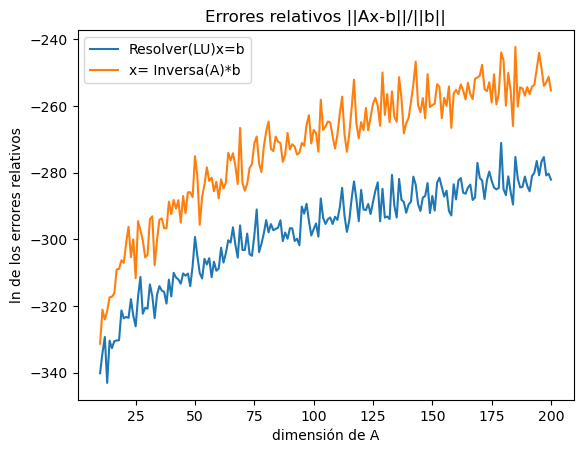

In [18]:
graficar1(v1,v2)

Conclusiones: menos error resolverLU (terminar de escribir)

\
$\textbf{Ejercicio 8}$

Repetimos todo el experimento del Ejercicio 7 pero midiendo los errores relativos entre las soluciones halladas y la solución original: $\frac{∥x_i−x∥_2}{∥x∥_2}$.


In [19]:
#Dados dos vectores x e y, calcula el error realtivo en norma 2.
def errorRelativoX (x,y):
    #Calcula el error relativo en norma 2
    e = np.log(np.linalg.norm(y-x, ord=2)/np.linalg.norm(x, ord=2))
    return(e)

In [20]:
todose1 = []
todose2 = []
for n in range (10,201):
    v1 = np.zeros(201)
    v2 = np.zeros(201)
    for i in range(1,11):
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        
        b = A@x
        
        x1=resolverLU(A,b)
        
        #Cambiamos el error relativo para x1.
        e1 = errorRelativoX(x,x1)
        
        x2=inversa(A)@b
        
        #Cambiamos el error relativo para x2.
        e2 = errorRelativoX(x,x2)
        
        todose1.append(e1)
        todose2.append(e2)

In [21]:
v1 = generaV(todose1)
v2 = generaV(todose2)

In [22]:
#Dados dos vectores v1 y v2, grafica errores relativos de las soluciones vs dimensión para los métodos LU e inversa.
def graficar2(v1,v2):
    n = np.arange(10, len(v1))
    plt.plot(n,v1[10:], label= "Resolver(LU)x=b")
    plt.plot(n,v2[10:], label= "x= Inversa(A)*b")
    plt.title("Errores relativos ||xi-x||/||x||")
    plt.xlabel("dimensión de A")
    plt.ylabel("ln de los errores relativos")
    plt.legend()
    plt.show() 

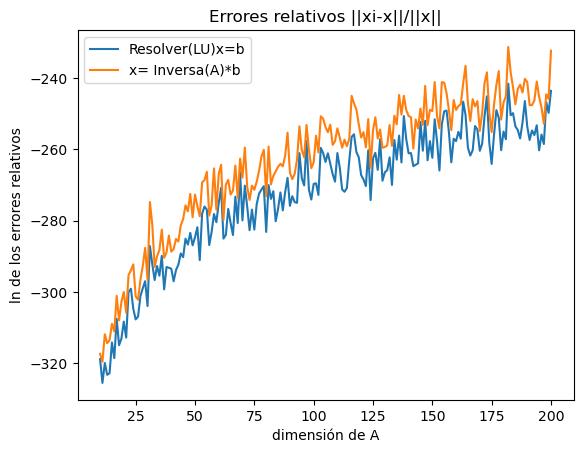

In [23]:
graficar2(v1,v2)

Conclusiones:

\
$\textbf{Ejercicio 9}$

Repetimos los experimentos del Ejercicio 7 y 8 pero utilizando los comandos np.linalg.solve y np.linalg.inv de numpy en lugar de las funciones resolverLU e inversa.

In [24]:
#Ejercicio 7 usando np.linag.solve. y np.linalg.inv
todose1 = []
todose2 = []
for n in range (10,201):
    v1 = np.zeros(201)
    v2 = np.zeros(201)
    for i in range(0,10):
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        
        b = A@x
        
        x1=np.linalg.solve(A,b)

        e1=np.log(errorRelativo(A,x1,b))

        x2=np.linalg.inv(A)@b

        e2=np.log(errorRelativo(A,x2,b))
        
        todose1.append(e1)
        todose2.append(e2)

In [25]:
v1 = generaV(todose1)
v2 = generaV(todose2)

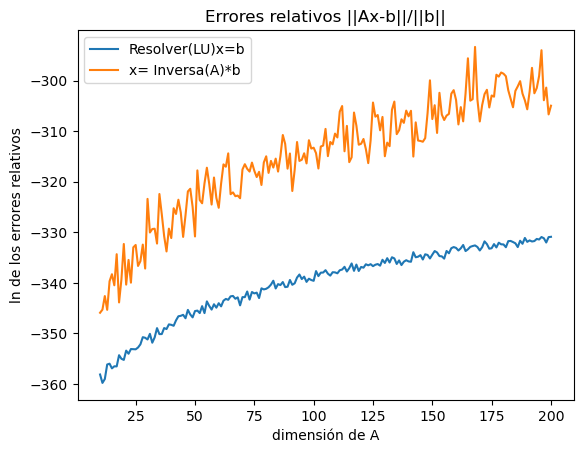

In [26]:
graficar1(v1,v2)

Conclusiones:

In [27]:
#Ejercicio 8 usando np.linag.solve. y np.linalg.inv
todose1 = []
todose2 = []
for n in range (10,201):
    v1 = np.zeros(201)
    v2 = np.zeros(201)
    for i in range(1,11):
        A = generaRandom(n)[0]
        x = generaRandom(n)[1]
        b = A@x
        
        x1=np.linalg.solve(A,b)

        e1=errorRelativoX(x,x1)
        
        x2=np.linalg.inv(A)@b

        e2=errorRelativoX(x,x2)
        
        todose1.append(e1)
        todose2.append(e2)

In [28]:
v1 = generaV(todose1)
v2 = generaV(todose2)

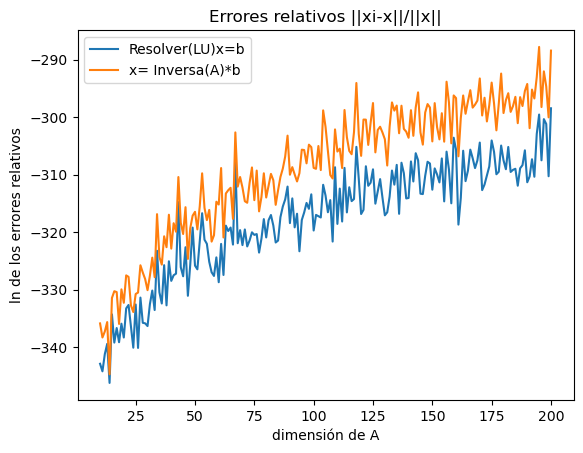

In [29]:
graficar2(v1,v2)

Conclusiones:

\
$\textbf{Ejercicio 10}$

Repetimos el experimento del Ejercicio 7 para n = 2, . . . , 20 pero utilizando únicamente una matriz A $\in \mathbb R^{n \times n}$ definida como aij = $ \frac{1}{1+i+j}$.

Luego, calculamos el número de condición de A.

In [30]:
#Creamos una listas vacias para guardar el número de condición de cada matriz.
condicion = []
for n in range (2,21):
        A = np.zeros((n,n))
        for i in range (0,n):
            for j in range (0,n):
                #Ponemos 3 para cumplir 
                A[i][j] = A[j][i] = 1/(3+i+j)
        
        numeroCondicion = np.linalg.cond(A)
        condicion.append(numeroCondicion)

In [31]:
#Creamos dos listas vacias, 
#en la primera vamos a guardar los errores relativos del primero método
todose1 = []
#y en la segunda los errores relativos del segundo método.
todose2 = []
condicion = []
for n in range (2,21):
    #Creamos dos listas v1 y v2 con 201 0s.
    v1 = np.zeros(21)
    v2 = np.zeros(21)
    #Empezamos los 10 experimentos.
    #1) a)
    for i in range(1,11):
       #Creamos una listas vacias para guardar el número de condición de cada matriz.
        A = np.zeros((n,n))
        for i in range (0,n):
            for j in range (0,n):
                A[i][j] = A[j][i] = 1/(1+i+j)
        
        numeroCondicion = np.linalg.cond(A)
        condicion.append(numeroCondicion)
        
        #vector de tamaño n de números aleatorios en [0,1).
        xp = np.random.rand(n)
        #vector de tamaño n de números aleatorios en [-1,0).
        xs = np.random.rand(n) - np.ones(n)
        #vector de tamaño n de números aleatorios en [-1,1).
        x = xp + xs
        #Calculamos b.
        b = A@x
        
        #b) 
        x1=resolverLU(A,b)

        #c)
        e1=np.log(errorRelativo(A,x1,b))

        #d)
        x2=inversa(A)@b

        #e)
        e2=np.log(errorRelativo(A,x2,b))
        
        todose1.append(e1)
        todose2.append(e2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2864\3224587784.py:36: RuntimeWarning: divide by zero encountered in log
  e1=np.log(errorRelativo(A,x1,b))
C:\Users\Acer\AppData\Local\Temp\ipykernel_2864\3224587784.py:42: RuntimeWarning: divide by zero encountered in log
  e2=np.log(errorRelativo(A,x2,b))


In [37]:
#Creamos dos listas vacias, 
#en la primera vamos a guardar los errores relativos del primero método
todose1 = []
#y en la segunda los errores relativos del segundo método.
todose2 = []
condicion = []
for n in range (2,21):
    #Creamos dos listas v1 y v2 con 201 0s.
    v1 = []
    v2 = []
    #Empezamos los 10 experimentos.
    #1) a)
    for i in range(1,11):
       #Creamos una listas vacias para guardar el número de condición de cada matriz.
        A = np.zeros((n,n))
        for i in range (0,n):
            for j in range (0,n):
                A[i][j] = A[j][i] = 1/(1+i+j)

    error_relativo_1 = 0
    error_relativo_2 = 0

    for m in range(10):
        # Defino b para tener un sistema a resolver
        b = np.random.rand(n)

        # Obtengo las soluciones del sistema por dos metodos distintos
        x1 = resolverLU(A,b)
        x2 = np.dot(inversa(A),b)

        error_relativo_1 = error_relativo_1 + errorRelativo(A,x1,b)
        error_relativo_2 = error_relativo_1 + errorRelativo(A,x2,b)
    
    v1.append(error_relativo_1)
    v2.append(error_relativo_2)
   
    # Calculo y guardo el condicional de a_ij para usarlo como referencia
    cond_a_ij = np.linalg.cond(A, p=2)
    condicion.append(cond_a_ij)

print(f'vector 1:\n{v1}\nvector 2:\n{v2}')    

vector 1:
[25.457828566828397]
vector 2:
[28.679840170595565]
